# 04. 다양한 회귀 알고리즘

## 1. Decision Tree (결정트리)Regression 

> - 데이터를 여러개의 규칙 기반 분할을 통해 학습한다.
> - 구간 평균으로 예측을 한다.

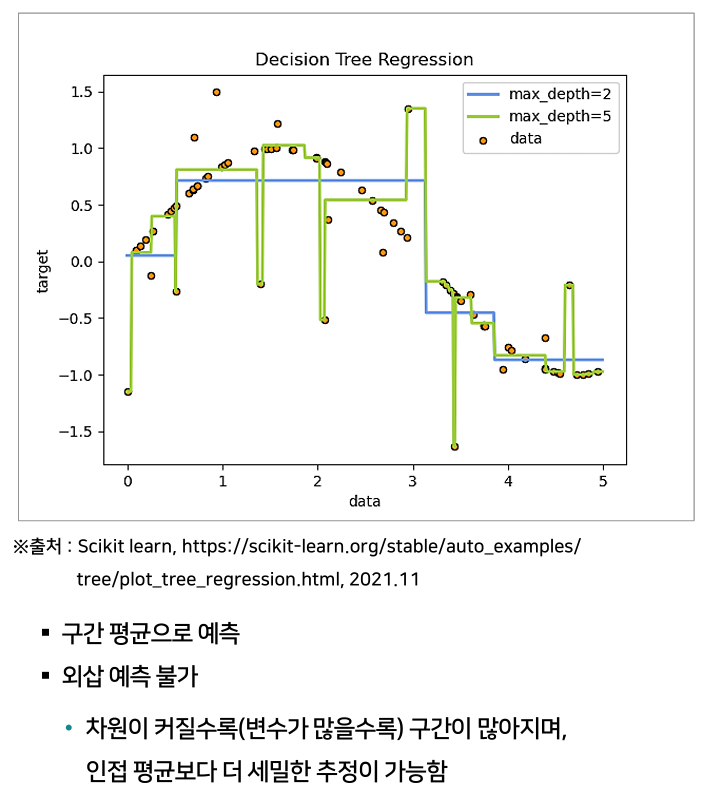

In [1]:
from IPython.display import Image
Image("../img/img04_01.png", width=600)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

결정계수 :  0.5097629887358219
평균 절대 오차 :  0.5978280732432436


[Text(0.5, 0.875, 'MedInc <= 0.633\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.625, 'MedInc <= -0.424\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.125, 0.375, 'AveRooms <= -0.47\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0625, 0.125, 'squared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.1875, 0.125, 'squared_error = 0.387\nsamples = 3644\nvalue = 1.165'),
 Text(0.375, 0.375, 'AveOccup <= -0.059\nsquared_error = 0.827\nsamples = 6833\nvalue = 2.09'),
 Text(0.3125, 0.125, 'squared_error = 1.248\nsamples = 1755\nvalue = 2.736'),
 Text(0.4375, 0.125, 'squared_error = 0.488\nsamples = 5078\nvalue = 1.867'),
 Text(0.75, 0.625, 'MedInc <= 1.579\nsquared_error = 1.218\nsamples = 3411\nvalue = 3.348'),
 Text(0.625, 0.375, 'AveOccup <= -0.037\nsquared_error = 0.908\nsamples = 2384\nvalue = 2.954'),
 Text(0.5625, 0.125, 'squared_error = 1.012\nsamples = 860\nvalue = 3.518'),
 Text(0.6875, 0.125, 'squared_error = 0.56

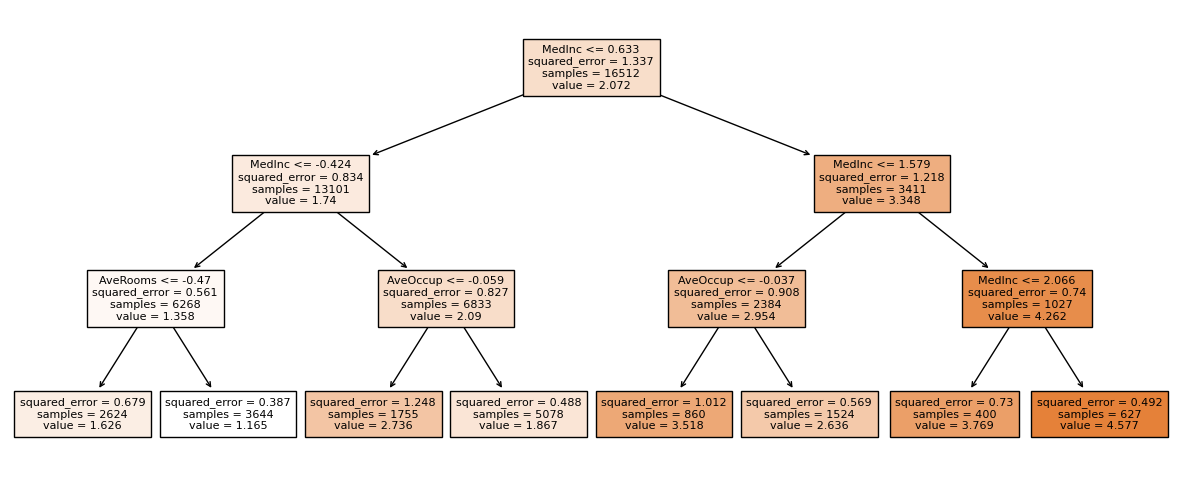

In [3]:
# 캘리포니아 주택 가격 데이터셋 로그
california = fetch_california_housing()

# 특성과 타겟 분리
x,y = california.data, california.target

# 훈련세트와 테스트 세트 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 (트리 깊이)
tree = DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = tree.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : ", r2)

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 : ", mae)

# 트리구조 시각화

# 시각화
plt.figure(figsize=(15,6))
plot_tree(tree, filled=True, feature_names=california.feature_names, fontsize=8)

## 2. K-최근접 이웃 회귀

> - 주어진 데이터 포인트의 최근접 이웃 K개를 참조하여 예측값을 결정하는 회귀 기법
> - 예측 데이터와 가장 가까운 k개의 학습 데이터의 평균값(y)으로 예측함
> - 거리를 기반으로 하는 모델은 스케일링이 필수적이다.

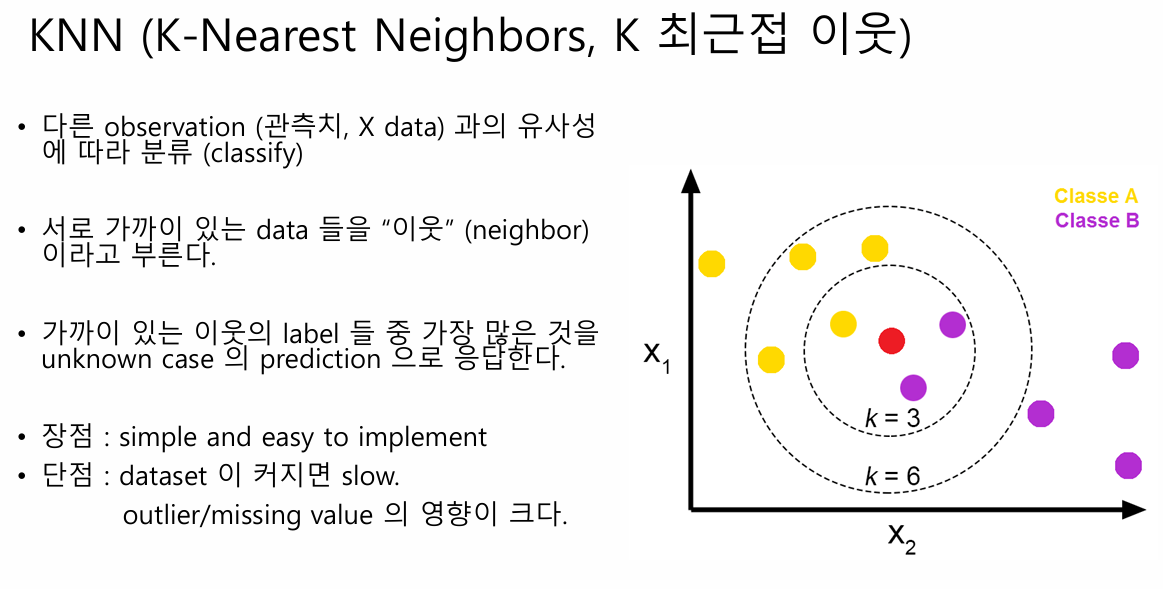

In [5]:
Image("../img/img04_02.png", width=600)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# 캘리포니아 주택가격 데이터 셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수 분리
x, y = california.data, california.target

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  데이터 정규화(표준화)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#모델 생성
KNN = KNeighborsRegressor()

# 교차 검증
param_grid = {'n_neighbors' : np.arange(1,30)}
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train,Y_train)

# 최적의 K값으로 모델 생성
best_n_neighbors = grid_search.best_params_['n_neighbors']
KNN_best = KNeighborsRegressor(n_neighbors = best_n_neighbors)
KNN_best.fit(X_train,Y_train)

# 테스트 세트에 대한 예측
Y_pred = KNN_best.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : ", r2)

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 : ", mae)



결정계수 :  0.6805629031793323
평균 절대 오차 :  0.43843182302677935


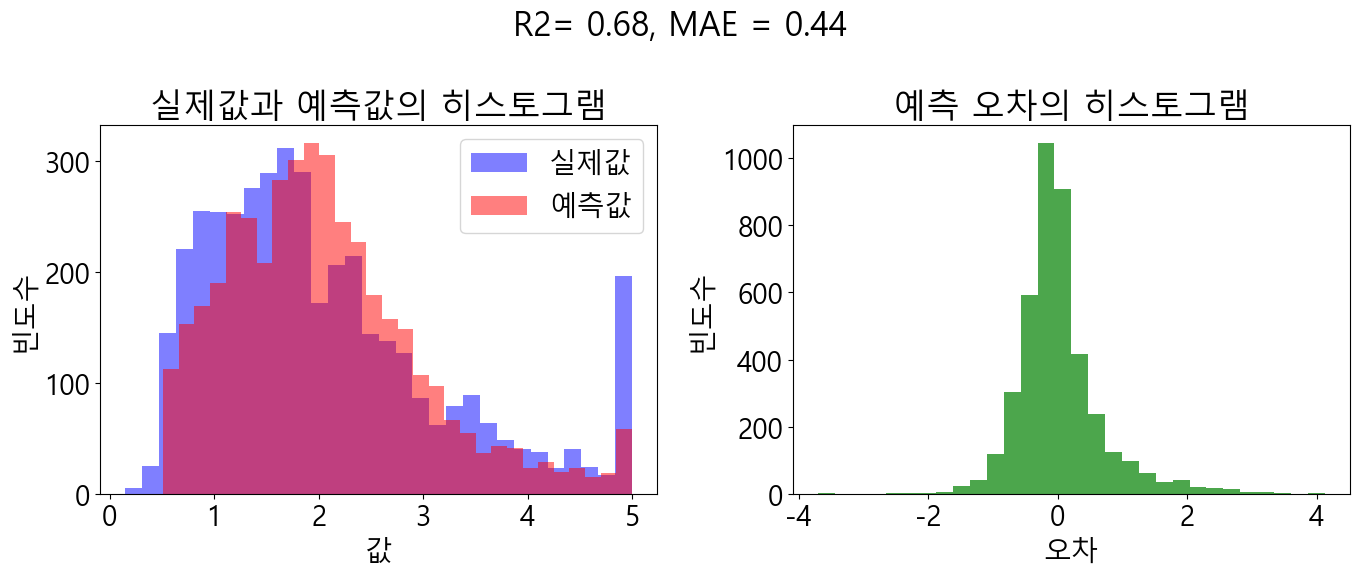

In [29]:
plt.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
plt.rcParams["font.size"] = 20                # 글자 크기
plt.rcParams["figure.figsize"] = (25,15)      # 그래프의 가로, 세로 크기 (inch단위)
plt.rcParams['axes.unicode_minus'] =False    # - 를 표시

# 시각화
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(Y_test, bins=30, alpha=0.5, label='실제값', color='b')
plt.hist(Y_pred, bins=30, alpha=0.5, label='예측값', color='r')
plt.title("실제값과 예측값의 히스토그램")
plt.xlabel('값')
plt.ylabel('빈도수')
plt.legend()

# 예측 오차 히스토그램

errors = Y_test - Y_pred
plt.subplot(1, 2, 2)
plt.hist(errors, bins=30, alpha=0.7, color='g')
plt.title("예측 오차의 히스토그램")
plt.xlabel('오차')
plt.ylabel('빈도수')

# 전체 타이틀 및 메트릭스 정보
plt.suptitle("R2= {0:0.2f}, MAE = {1:0.2f}".format(r2, mae))

plt.tight_layout()
plt.show()

## 3. SVR(Support Vector Regression)

> - 원래는 분류문제를 해결하기 위해서 개발되었으나 회귀 문제에도 적용할 수 있음
> - 데이터 포인트 사이의 거리를 최소화 하면서 최적의 초평면을 찾는 방식
> - MSE 와 L2 손실을 최소화 하기 위해 스케일링을 해야함

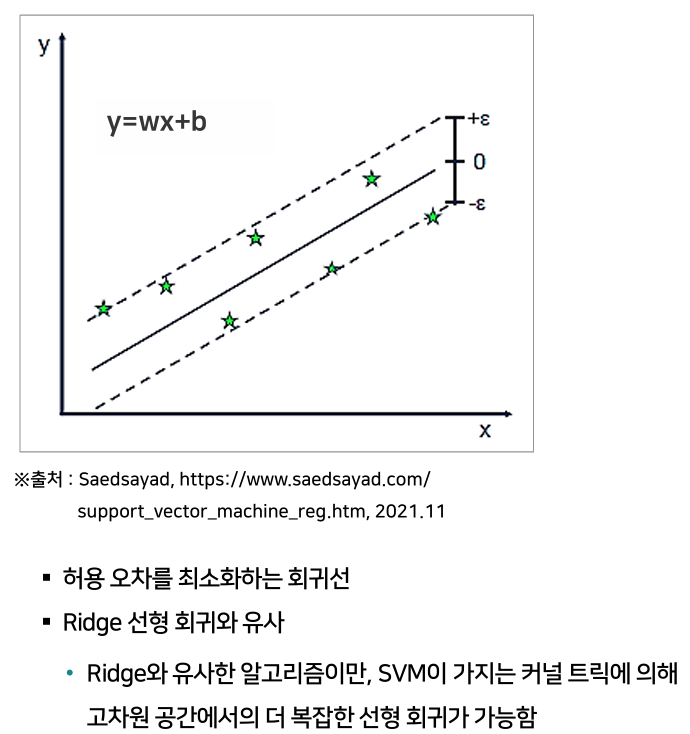

In [45]:
Image("../img/img04_03.png", width=600)

결정계수 :  0.727563952473304
평균 절대 오차 :  0.3985982830145761


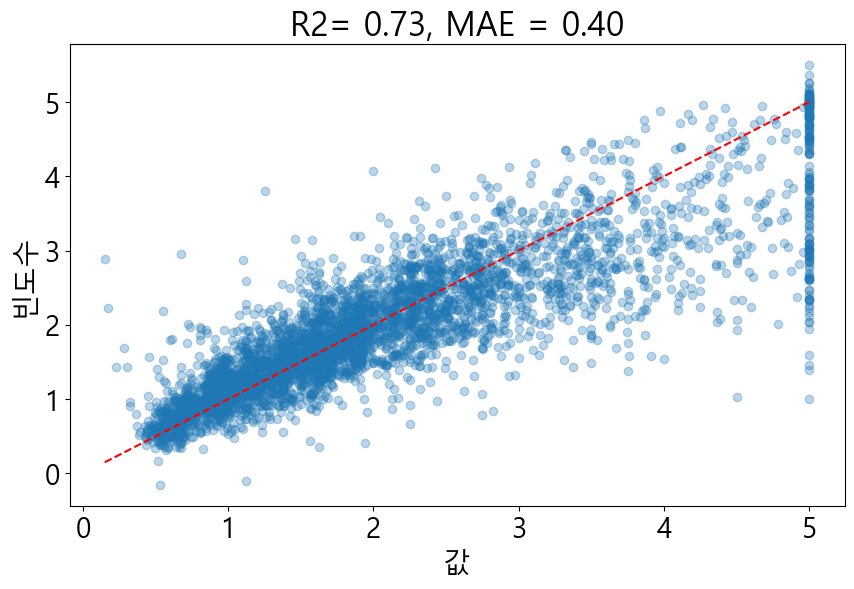

In [44]:
from sklearn.svm import SVR
# 캘리포니아 주택가격 데이터 셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수 분리
x, y = california.data, california.target

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  데이터 정규화(표준화)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#모델 생성
# rbf 비선형 모델링
# linear (선형커널)
# C값이 클수록 모델은 오차를 줄이기 위해서 더 많이 노력하지만, 과적합 위험이 있음
# C값은 모델의 복잡도와 오차 허용 사이의 균형을 조절한다.
# epsilon은 마진의 너비 : 작게 설정하면 더 많은 데이터 포인트를 고려
svr = SVR(kernel = 'rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)


# 테스트 세트에 대한 예측
Y_pred = svr.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : ", r2)

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 : ", mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], 'r--')
plt.title("R2= {0:0.2f}, MAE = {1:.2f}".format(r2,mae))
plt.xlabel('값')
plt.ylabel('빈도수')
plt.show()